In [ ]:
from time import sleep
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re

from glob import glob
import numpy as np
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.layers import Bidirectional, GlobalMaxPool1D
from sklearn.preprocessing import StandardScaler, RobustScaler
import os, re, csv, math, codecs

from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs


from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from sklearn.metrics import *
import xgboost as xgb
import pickle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd  
from random import random
from keras.utils import to_categorical
import numpy as np
import os
import psutil
from sklearn.model_selection import train_test_split
from keras.utils import *
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from tqdm import tqdm
import pandas as pd
from sklearn import preprocessing
import gc
gc.collect()
from time import sleep
#print(list(psutil.virtual_memory())[0:2])
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
warnings.filterwarnings("ignore")



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes /

In [ ]:
!gdown --id 1MjEK-6t0-2yMbAqSKAV5sYkbo8G47CxI&export=download

Downloading...
From: https://drive.google.com/uc?id=1MjEK-6t0-2yMbAqSKAV5sYkbo8G47CxI
To: /content/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
383MB [00:01, 204MB/s]


In [ ]:
MyList = []
for chunk in 	pd.read_csv('Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',delimiter=',', chunksize=10000):
  print(len(MyList))
  chunk.fillna(chunk.mean())
  chunk[chunk==np.inf]=np.nan
  chunk.fillna(chunk.mean(), inplace=True)
  MyList.append(chunk)
df = pd.concat(MyList, axis=0)
print(df.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
(1048575, 80)


In [ ]:
# df.fillna(df.mean())
# df[df==np.inf]=np.nan
# df.fillna(df.mean(), inplace=True)
df.to_pickle('DataFrame.pkl')    

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1) 

df = df.rename(columns={'Pkt Size Avg':'Pkt_Size_Avg','Subflow Fwd Byts':'Subflow_Fwd_Byts','TotLen Fwd Pkts':'TotLen_Fwd_Pkts','Fwd Seg Size Avg':'Fwd_Seg_Size_Avg','Fwd Pkt Len Mean':'Fwd_Pkt_Len_Mean','Bwd Seg Size Avg':"Bwd_Seg_Size_Avg",'Bwd Pkt Len Mean':'Bwd_Pkt_Len_Mean','RST Flag Cnt':'RST_Flag_Cnt',"ECE Flag Cnt":"ECE_Flag_Cnt",'Fwd Pkt Len Min':'Fwd_Pkt_Len_Min','Pkt Len Min':'Pkt_Len_Min','Idle Std':'Idle_Std', 'Flow IAT Min': 'Flow_IAT_Min', 'Flow Duration': 'Flow_Duration','Bwd Pkts/s':'Bwd_Pkts_s', "Dst Port":'Dst_Port', "Fwd Seg Size Min":'Fwd_Seg_Size_Min', "Init Fwd Win Byts":"Init_Fwd_Win_Byts", "Init Bwd Win Byts":"Init_Bwd_Win_Byts", "Flow Pkts/s":"Flow_Pkts_s", "Fwd Pkts/s":"Fwd_Pkts_s", "PSH Flag Cnt":"PSH_Flag_Cnt","Tot Fwd Pkts":"Tot_Fwd_Pkts","Tot Bwd Pkts":"Tot_Bwd_Pkts","TotLen Fwd Pkts":"TotLen_Fwd_Pkts","TotLen Bwd Pkts":"TotLen_Bwd_Pkts","Flow Byts/s":"Flow_Byts_s","Flow IAT Mean":"Flow_IAT_Mean","Flow IAT Std":"Flow_IAT_Std","Flow IAT Max":"Flow_IAT_Max","Flow IAT Tot":"Flow_IAT_Tot","Fwd IAT Tot":"Fwd_IAT_Tot","Fwd IAT Mean":"Fwd_IAT_Mean","Fwd IAT Std":"Fwd_IAT_Std","Fwd IAT Max":"Fwd_IAT_Max","Fwd IAT Min":"Fwd_IAT_Min",   "Bwd IAT Tot":"Bwd_IAT_Tot","Bwd IAT Mean":"Bwd_IAT_Mean","Bwd IAT Std":"Bwd_IAT_Std","Bwd IAT Max":"Bwd_IAT_Max","Bwd IAT Min":"Bwd_IAT_Min","Fwd Header Len":"Fwd_Header_Len"})

#df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Label']=df['Label'].replace({'Brute Force -Web': 'BruteForceWeb','Brute Force -XSS':'BruteForceXSS','SQL Injection':'SQLInjection'})



df.replace([np.inf, -np.inf], np.nan, inplace=True)

encoder = LabelEncoder()
new_df = df['Label'].copy()
#print("new_df",new_df)
#print("new_df",new_df['Label'])

# Now apply the transformation to all the columns:
for col in df.columns:
    print(col)
    if col=="Label":
    	df[col] = encoder.fit_transform(df[col])


Dst_Port
Protocol
Timestamp
Flow_Duration
Tot_Fwd_Pkts
Tot_Bwd_Pkts
TotLen_Fwd_Pkts
TotLen_Bwd_Pkts
Fwd Pkt Len Max
Fwd_Pkt_Len_Min
Fwd_Pkt_Len_Mean
Fwd Pkt Len Std
Bwd Pkt Len Max
Bwd Pkt Len Min
Bwd_Pkt_Len_Mean
Bwd Pkt Len Std
Flow_Byts_s
Flow_Pkts_s
Flow_IAT_Mean
Flow_IAT_Std
Flow_IAT_Max
Flow_IAT_Min
Fwd_IAT_Tot
Fwd_IAT_Mean
Fwd_IAT_Std
Fwd_IAT_Max
Fwd_IAT_Min
Bwd_IAT_Tot
Bwd_IAT_Mean
Bwd_IAT_Std
Bwd_IAT_Max
Bwd_IAT_Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd_Header_Len
Bwd Header Len
Fwd_Pkts_s
Bwd_Pkts_s
Pkt_Len_Min
Pkt Len Max
Pkt Len Mean
Pkt Len Std
Pkt Len Var
FIN Flag Cnt
SYN Flag Cnt
RST_Flag_Cnt
PSH_Flag_Cnt
ACK Flag Cnt
URG Flag Cnt
CWE Flag Count
ECE_Flag_Cnt
Down/Up Ratio
Pkt_Size_Avg
Fwd_Seg_Size_Avg
Bwd_Seg_Size_Avg
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Bwd Pkts/b Avg
Bwd Blk Rate Avg
Subflow Fwd Pkts
Subflow_Fwd_Byts
Subflow Bwd Pkts
Subflow Bwd Byts
Init_Fwd_Win_Byts
Init_Bwd_Win_Byts
Fwd Act Data Pkts
Fwd_Seg_Size_Min
Ac

                Specs       Score
72  Idle_Std           999.072858
36  Pkt_Len_Min        621.143339
5   Fwd_Pkt_Len_Min    538.810360
48  ECE_Flag_Cnt       429.532402
43  RST_Flag_Cnt       429.520092
10  Bwd_Pkt_Len_Mean   394.957381
52  Bwd_Seg_Size_Avg   394.957381
38  Pkt Len Mean       259.133119
6   Fwd_Pkt_Len_Mean   228.052205
51  Fwd_Seg_Size_Avg   228.052205
2   TotLen_Fwd_Pkts    214.579278
60  Subflow_Fwd_Byts   214.579278
50  Pkt_Size_Avg       186.492893
40  Pkt Len Var        175.188506
65  Fwd Act Data Pkts  172.469737
18  Fwd_IAT_Tot        156.285503
70  Active Min         114.697099
15  Flow_IAT_Std       103.740298
20  Fwd_IAT_Std        88.903471 
39  Pkt Len Std        83.910271 
[1.79130170e-02 6.00243463e-03 1.30362985e-02 1.26181758e-02
 5.65176355e-03 3.31192593e-03 9.66998898e-03 6.17953671e-03
 1.39353077e-02 6.89473548e-05 1.80576306e-02 8.35608544e-03
 4.16325053e-03 2.26169560e-02 2.07641886e-02 2.42765847e-02
 2.50944196e-02 2.55806346e-02 2.84131057e

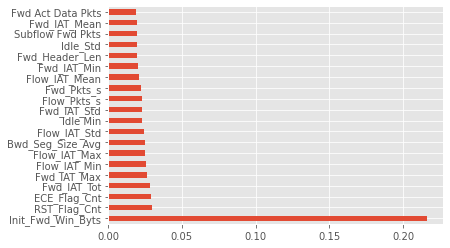

In [ ]:
X = df.iloc[:,4:79]  #independent columns
X1=df.iloc[:,4:79]
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
#x = X.astype(float)
X = min_max_scaler.fit_transform(X)
y = df.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()



In [ ]:

number_of_labels = new_df.nunique() 
print("number_of_labels",number_of_labels)
# printing value 
print("number_of_labels",number_of_labels)  #4
print(new_df.unique()) #['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection'] 
print((new_df=='Benign').sum()) #1048009
print((new_df=='BruteForceWeb').sum())  #362
print((new_df=='BruteForceXSS').sum())  #151
print((new_df=='SQLInjection').sum())     #53

columns = list(df) 
print("columns",columns)
arr_labels = new_df.to_numpy()
print("arr_labels",arr_labels)
print("arr_labels",len(arr_labels)) #arr 1048575
print("arr_labels",arr_labels.shape) #arr (1048575,)
# Total missing values for each feature
print ("Total missing values for each feature",df.isnull().sum())
with open("missing.txt",'w') as f:
	f.write(str(df.isnull().sum()))

# Any missing values?
print ("Any missing values?",df.isnull().values.any())

# Total number of missing values
print ("Total number of missing values",df.isnull().sum().sum())
#df = df.reset_index()
df.replace([np.inf, -np.inf], np.nan, inplace=True)


number_of_labels 4
number_of_labels 4
['Benign' 'BruteForceWeb' 'BruteForceXSS' 'SQLInjection']
1048009
362
151
53
columns ['Dst_Port', 'Protocol', 'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd Pkt Len Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd_Pkt_Len_Mean', 'Bwd Pkt Len Std', 'Flow_Byts_s', 'Flow_Pkts_s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd_Header_Len', 'Bwd Header Len', 'Fwd_Pkts_s', 'Bwd_Pkts_s', 'Pkt_Len_Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE_Flag_Cnt', 'Down/Up Rati

In [ ]:
Row_list =[] 
  
# Iterate over each row 
for index, rows in tqdm(df.iterrows()): 
    # Create list for the current row 
    #my_list =[rows.Flow_IAT_Min,rows.Flow_Duration,rows.Bwd_Pkts_s,rows.Dst_Port] 
    my_list=[rows.Flow_Duration,rows.Bwd_Pkts_s, rows.Dst_Port, rows.Fwd_Seg_Size_Min, rows.Init_Fwd_Win_Byts, rows.Init_Bwd_Win_Byts, rows.Fwd_Pkts_s, rows.PSH_Flag_Cnt,rows.Tot_Fwd_Pkts,rows.Tot_Bwd_Pkts,rows.TotLen_Fwd_Pkts,rows.TotLen_Bwd_Pkts,rows.Flow_IAT_Mean,rows.Flow_IAT_Std,rows.Flow_IAT_Max,rows.Flow_IAT_Min,rows.Fwd_IAT_Tot,rows.Fwd_IAT_Mean,rows.Fwd_IAT_Std,rows.Fwd_IAT_Max,rows.Fwd_IAT_Min,  rows.Bwd_IAT_Tot,rows.Bwd_IAT_Mean,rows.Bwd_IAT_Std,rows.Bwd_IAT_Max,rows.Bwd_IAT_Min,rows.Fwd_Header_Len,rows.Pkt_Size_Avg,rows.Subflow_Fwd_Byts,rows.TotLen_Fwd_Pkts,rows.Fwd_Seg_Size_Avg,rows.Fwd_Pkt_Len_Mean,rows.Bwd_Seg_Size_Avg,rows.Bwd_Pkt_Len_Mean,rows.RST_Flag_Cnt,rows.ECE_Flag_Cnt,rows.Fwd_Pkt_Len_Min,rows.Pkt_Len_Min,rows.Idle_Std]


      
    # append the list to the final list 
    Row_list.append(my_list) 
  
# Print the list 
#print("Row_list",Row_list) 
print("Row_list",len(Row_list)) #Row_list 1048575

1048575it [05:56, 2942.86it/s]

Row_list 1048575


In [ ]:
'''
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("property data.csv", na_values = missing_values)
'''

# Total missing values for each feature
print ("Total missing values for each feature",df.isnull().sum())
with open("missing.txt",'w') as f:
	f.write(str(df.isnull().sum()))

# Any missing values?
print ("Any missing values?",df.isnull().values.any())

# Total number of missing values
print ("Total number of missing values",df.isnull().sum().sum())
#sleep(100)




#Row_list1=df.iloc[:, 'Flow_IAT_Min':'Flow_Duration']
print("df.shape",df.shape) #df.shape (1048575, 80)


le = LabelEncoder()
y1 = le.fit_transform(arr_labels)
print("y1",y1)

y=to_categorical(y1,num_classes=4)
print(y.shape)
encoded1=np.array(Row_list)
encoded=np.reshape(encoded1,(encoded1.shape[0],encoded1.shape[1],1))

'''
classTotals = y.sum(axis=0)
print("classTotals",classTotals) #classTotals [2688. 1315.]
classWeight = classTotals.max() / classTotals
print("classTotals max",classTotals.max()) #classTotals max 2688.0
print("classWeight",classWeight) #classWeight [1.        2.0441065]
#sleep(100)
'''


Total missing values for each feature Dst_Port             0
Protocol             0
Timestamp            0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd Pkt Len Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd_Pkt_Len_Mean     0
Bwd Pkt Len Std      0
Flow_Byts_s          0
Flow_Pkts_s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd_Header_Len       0
Bwd Header Len       0
Fwd_Pkts_s           0
Bwd_Pkts_s           0
Pkt_Len_Min          0
Pkt Len Max        

'\nclassTotals = y.sum(axis=0)\nprint("classTotals",classTotals) #classTotals [2688. 1315.]\nclassWeight = classTotals.max() / classTotals\nprint("classTotals max",classTotals.max()) #classTotals max 2688.0\nprint("classWeight",classWeight) #classWeight [1.        2.0441065]\n#sleep(100)\n'

n_classes 4
y [0 0 0 ... 0 0 0]


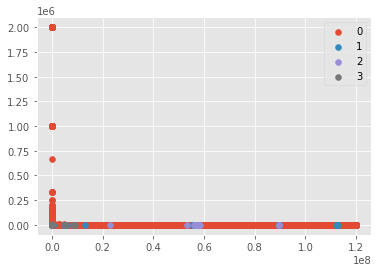

In [ ]:

# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
	# create scatter plot for samples from each class
	n_classes = len(unique(y))
	print("n_classes",n_classes)
	print("y",y)
	for class_value in range(n_classes):
		# get row indexes for samples with this class
		row_ix = where(y == class_value)[0]
		#print("row_ix",row_ix)
		# create scatter of these samples
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
	# show a legend
	pyplot.legend()
	# show the plot
	pyplot.show()

plot_dataset(encoded1, y1)



encoded1 (1048575, 39)
X_features (1048575, 39)


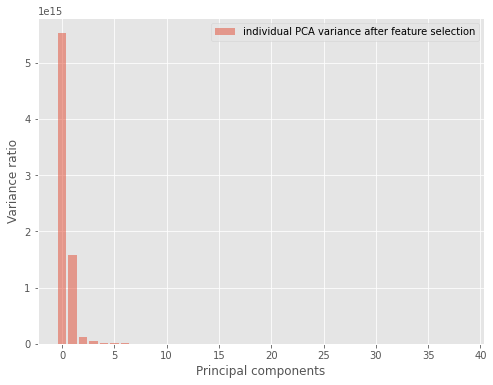

In [ ]:
#X_features = encoded1
print("encoded1",encoded1.shape)

X_features = encoded1
print("X_features",X_features.shape)
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(X_features.shape[1]), pca_variance, alpha=0.5, align='center', label='individual PCA variance after feature selection')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

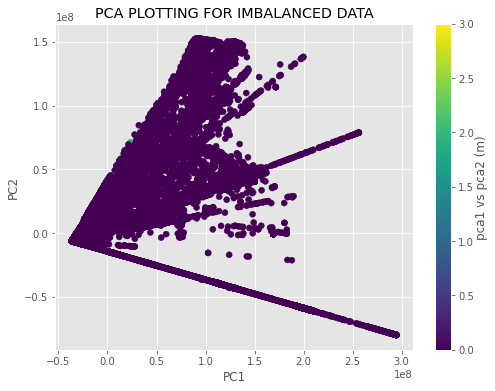

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(X_features)
x_3d = pca2.transform(encoded1)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=df['Label'])
plt.title("PCA PLOTTING FOR IMBALANCED DATA")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar= plt.colorbar()
cbar.set_label("pca1 vs pca2 (m)", labelpad=+1)
plt.show()

In [ ]:
# Split the data
X_train, X_test, Y_TRAIN, Y_TEST = train_test_split(encoded1, y1, test_size=0.50, shuffle= True)
Y_TRAIN1=to_categorical(Y_TRAIN,num_classes=4)
Y_TEST1=to_categorical(Y_TEST,num_classes=4)

from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K

print(X_train.shape)
print(X_test.shape)

(524287, 39)
(524288, 39)


In [ ]:
input_img= Input(shape=(39,))
'''
encoded = Dense(units=39)(input_img)
encoded = Dense(units=100)(encoded)
encoded = Dense(units=50)(encoded)
encoded = Dense(units=25)(encoded)
encoded = Dense(units=12)(encoded)
encoded = Dense(units=6)(encoded)

decoded = Dense(units=12)(encoded)
decoded = Dense(units=25)(decoded)
decoded = Dense(units=50)(decoded)
decoded = Dense(units=100)(decoded)
#decoded = Dense(units=200, activation='relu')(decoded)
decoded = Dense(units=39, activation='softmax')(decoded) #rmsprop

'''
encoded = Dense(units=39, activation='relu')(input_img)
encoded = Dense(units=50, activation='relu')(encoded)
encoded = Dense(units=25, activation='relu')(encoded)
encoded = Dense(units=12, activation='relu')(encoded)
encoded = Dense(units=6, activation='relu')(encoded)


decoded = Dense(units=12, activation='relu')(encoded)
decoded = Dense(units=25, activation='relu')(decoded)
decoded = Dense(units=50, activation='relu')(decoded)
decoded = Dense(units=39, activation='softmax')(decoded)


In [ ]:
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 39)]              0         
_________________________________________________________________
dense (Dense)                (None, 39)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2000      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                84    

In [ ]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 39)]              0         
_________________________________________________________________
dense (Dense)                (None, 39)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2000      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
Total params: 5,225
Trainable params: 5,225
Non-trainable params: 0
_________________________________________________________

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
#We finally train the autoencoder using the training data with 50 epochs and batch size of 256.
autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#We finally train the autoencoder using the training data with 50 epochs and batch size of 256.
pre_test=encoder.predict(X_test)
print(pre_test.shape)
pre_test=np.reshape(pre_test,(pre_test.shape[0],pre_test.shape[1],1))
print(pre_test.shape)

pre_train=encoder.predict(X_train)
print(pre_train.shape)
pre_train=np.reshape(pre_train,(pre_train.shape[0],pre_train.shape[1],1))
print(pre_train.shape)


Epoch 1/5
8192/8192 [==============================] - 41s 5ms/step - loss: 223630345874786.5938 - accuracy: 0.0851 - val_loss: 222171477573632.0000 - val_accuracy: 0.1172
Epoch 2/5
8192/8192 [==============================] - 38s 5ms/step - loss: 222951617798183.0000 - accuracy: 0.1166 - val_loss: 222171477573632.0000 - val_accuracy: 0.1187
Epoch 3/5
8192/8192 [==============================] - 37s 5ms/step - loss: 223178699609883.2812 - accuracy: 0.1166 - val_loss: 222171477573632.0000 - val_accuracy: 0.1184
Epoch 4/5
8192/8192 [==============================] - 38s 5ms/step - loss: 224600008778260.9375 - accuracy: 0.1166 - val_loss: 222171477573632.0000 - val_accuracy: 0.1162
Epoch 5/5
8192/8192 [==============================] - 37s 5ms/step - loss: 224102582804804.9688 - accuracy: 0.1162 - val_loss: 222171477573632.0000 - val_accuracy: 0.1185
(524288, 6)
(524288, 6, 1)
(524287, 6)
(524287, 6, 1)


In [ ]:

model = Sequential()
model.add(LSTM(128,input_shape=(pre_train.shape[1],pre_train.shape[2]),return_sequences=True))
#model.add(Bidirectional(LSTM(128,input_shape=(pre_train.shape[1],pre_train.shape[2]),return_sequences=True)))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.20))
model.add(Dense(4, activation='softmax'))


In [ ]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
# fit network
checkpoint = ModelCheckpoint("check.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
#callbacks_list = [checkpoint,earlystopping] #
model.fit(pre_train, Y_TRAIN1,batch_size=64, shuffle=True,epochs=1, verbose=1,validation_data=(pre_test,Y_TEST1))
#model.save("BILSTM.h5")

yhat_classes = model.predict_classes(pre_test, verbose=1)

from sklearn.metrics import classification_report, confusion_matrix
import itertools    
print(" ") 
print("START OF CONFUSION CALCULATION") 
print('Confusion Matrix Calculation')
cm=confusion_matrix(Y_TEST, yhat_classes)
print("Confusion Matrix",cm)


16384/16384 [==============================] - 62s 4ms/step
 
START OF CONFUSION CALCULATION
Confusion Matrix Calculation
Confusion Matrix [[523989      2      0      0]
 [   170     17      0      0]
 [    74      6      0      0]
 [    23      7      0      0]]


Confusion matrix, without normalization
[[523989      2      0      0]
 [   170     17      0      0]
 [    74      6      0      0]
 [    23      7      0      0]]


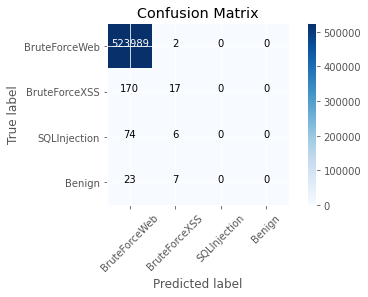

END OF CONFUSION CALCULATION
 


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
cm_plot_labels = ['BruteForceWeb','BruteForceXSS','SQLInjection','Benign']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("END OF CONFUSION CALCULATION") 
print(" ") 


In [ ]:
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_TEST, yhat_classes)
print('Testing Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_TEST, yhat_classes,average='weighted')
print('Testing Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_TEST, yhat_classes,average='weighted')
print('Testing Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_TEST, yhat_classes,average='weighted')
print('Testing F1 score: %f' % f1)


Testing Accuracy: 0.999462
Testing Precision: 0.999114
Testing Recall: 0.999462
Testing F1 score: 0.999232
